<b>ПИ19-3 Деменчук<br>
ML2.2 Классификация изображений</b>

Импортируем необходимые библиотеки для работы

In [1]:
#Больше библиотек Богу библиотек!
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

Загружаем датасет Olivetti faces

In [2]:
faces = fetch_olivetti_faces()

Выводим инфу о количественных параметрах датасета

In [3]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
faces["data"].shape

(400, 4096)

In [5]:
faces["images"].shape

(400, 64, 64)

Выводим изображения

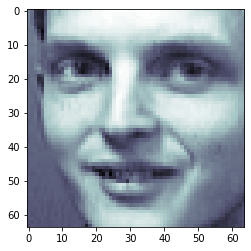

In [6]:
for img in faces["images"]:
    plt.imshow(img, cmap=plt.cm.bone)

Выводим все изображения, связанные с конкретным человеком<br>
1 - количество строк<br>
n - количество столбцов<br>

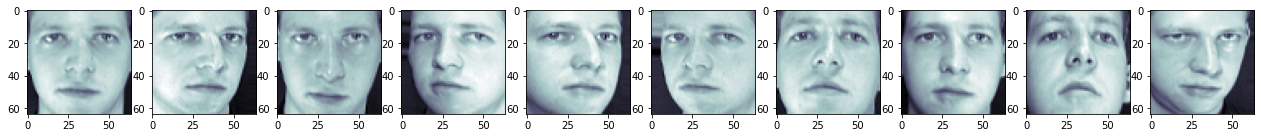

In [7]:
items_count = 10
fig, axs = plt.subplots(1, items_count, figsize=(22, 22))
for i in range(items_count):
    axs[i].imshow(faces.images[i], cmap=plt.cm.bone)

Делим данные на тестовую и обучающую выборки

In [8]:
#матрица пикселей
X = faces.data

#Отношение данных к конкретному классу
Y = faces.target
 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

Строим модель классификатора метода опорных векторов для идентификации человека по изображению

In [9]:
clf = svm.SVC()
clf.fit(X, Y)

SVC()

In [10]:
y_pred = clf.predict(x_test)

Строим матрицу предсказаний

Text(0.5, 177.0, 'Предсказанные значения')

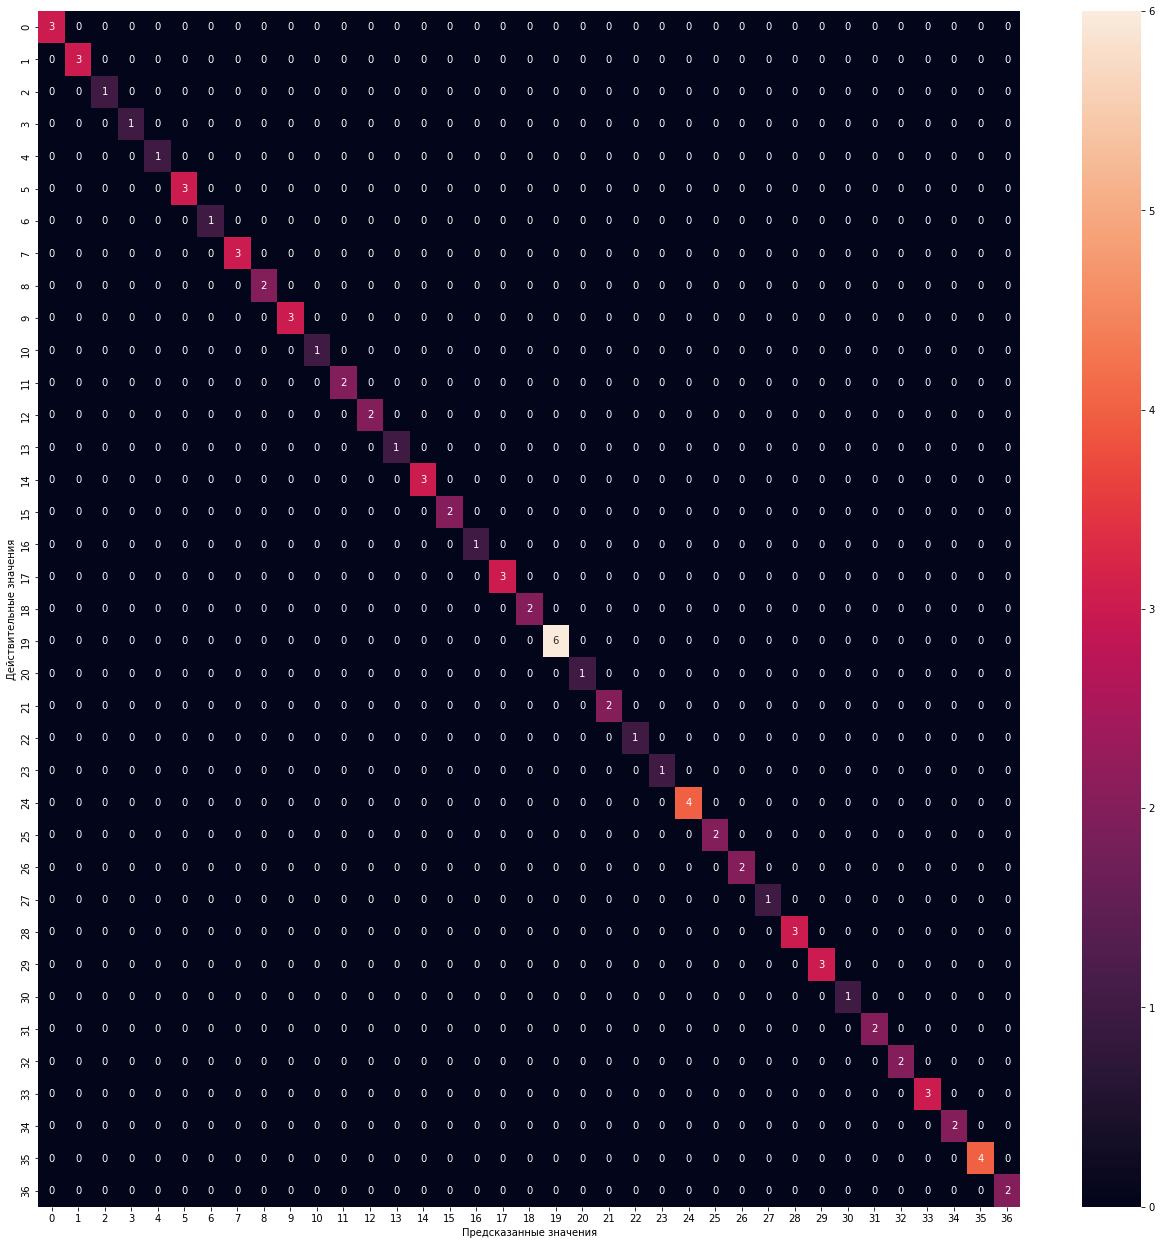

In [11]:
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots(figsize=(22, 22))

ticks = np.arange(len(class_names))

#Добавлем ось x
plt.xticks(ticks, class_names)
#Добавляем ось y
plt.yticks(ticks, class_names)

#Строим матрицу при помощи sns
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Оцениваем качество модели на тестовой выборке с помощью следующих метрик
- достоверность предсказания (accuracy)
- точность (precision)
- полнота (recall)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         1
          20       1.00    

Строим график зависимости тестовой и обучающей эффективности от размера обучающей выборки

In [13]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    
    axes[0].set_xlabel("Тренировочные примеры")
    axes[0].set_ylabel("Оценка")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color="r",)
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Тренировочная оценка")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Оценка кросс-валидации")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes,fit_times_mean - fit_times_std,fit_times_mean + fit_times_std,alpha=0.1,)
    axes[1].set_xlabel("Тренировочные данные")
    axes[1].set_ylabel("Успешность")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted,test_scores_mean_sorted - test_scores_std_sorted,test_scores_mean_sorted + test_scores_std_sorted,alpha=0.1,)
    axes[2].set_xlabel("Успешность")
    axes[2].set_ylabel("Оценка")
    axes[2].set_title("Эффективность модели")

    return plt

<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.9/site-packages/matplotlib/pyplot.py'>

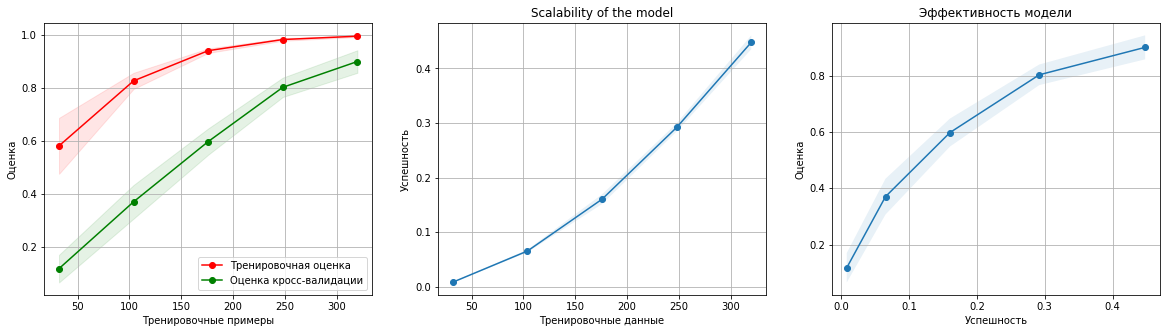

In [14]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(clf, "", X, Y, cv=cv)

### Вывод

Модель можно применить, но стоит увеличить объем данных, например, за счет аугментации на основе методов с библиотеки OpenCV (наклон под углом, произвольное изменение пикселей, зеркалирование по вертикали/горизонтали) т.к. 400 очень мало, даже с учетом кросс-валидации